In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
train_data = pd.read_excel('train_data.xlsx')
test_data = pd.read_excel('test_data.xlsx')

In [4]:
# Display the first few rows of the training data
train_data.head()

,customer_id,transaction_date,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status
0,10608026,2014-01-01,C5,36 months,MORTGAGE,665,9,70000.0,16.24,debt_consolidation,7200,Individual,253.99,Verified,4648,11,0
1,10235120,2014-01-01,E5,36 months,MORTGAGE,660,8,65000.0,23.40,home_improvement,6000,Individual,233.52,Source Verified,14051,11,1
2,10705805,2014-01-01,D2,36 months,MORTGAGE,660,7,73000.0,17.57,other,8000,Individual,287.50,Verified,14885,11,0
3,11044991,2014-01-01,B4,36 months,MORTGAGE,690,5,118000.0,12.85,debt_consolidation,10000,Individual,336.22,Source Verified,7542,2,1
4,10161054,2014-01-01,C3,60 months,MORTGAGE,665,5,63000.0,14.98,debt_consolidation,10000,Individual,237.80,Verified,6318,11,0


In [5]:
# Check for missing values
missing_values = train_data.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

In [7]:
# Handle missing values
# Fill missing values for numeric columns with the mean
numeric_cols = train_data.select_dtypes(include=[np.number]).columns
train_data[numeric_cols] = train_data[numeric_cols].fillna(train_data[numeric_cols].mean())


In [8]:
# Fill missing values for non-numeric columns with the mode
non_numeric_cols = train_data.select_dtypes(include=['object']).columns
for col in non_numeric_cols:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)


C:\Users\kaise\AppData\Local\Temp\ipykernel_24448\1969091397.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].mode()[0], inplace=True)


In [9]:
# Display the first few rows after handling missing values to verify
print("\nFirst few rows after handling missing values:")
print(train_data.head())


First few rows after handling missing values:
   customer_id transaction_date sub_grade        term home_ownership  \
0     10608026       2014-01-01        C5   36 months       MORTGAGE   
1     10235120       2014-01-01        E5   36 months       MORTGAGE   
2     10705805       2014-01-01        D2   36 months       MORTGAGE   
3     11044991       2014-01-01        B4   36 months       MORTGAGE   
4     10161054       2014-01-01        C3   60 months       MORTGAGE   

   cibil_score  total_no_of_acc  annual_inc  int_rate             purpose  \
0          665                9     70000.0     16.24  debt_consolidation   
1          660                8     65000.0     23.40    home_improvement   
2          660                7     73000.0     17.57               other   
3          690                5    118000.0     12.85  debt_consolidation   
4          665                5     63000.0     14.98  debt_consolidation   

   loan_amnt application_type  installment verification_s

In [10]:
# Optionally, check for any remaining missing values
print("\nRemaining missing values in the dataset:")
print(train_data.isnull().sum())


Remaining missing values in the dataset:
customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


In [11]:
# Summary statistics
summary_stats = train_data.describe()
summary_stats

,customer_id,transaction_date,cibil_score,total_no_of_acc,annual_inc,int_rate,loan_amnt,installment,account_bal,emp_length,loan_status
count,1.137050e+05,113705,113705.000000,113705.000000,1.137050e+05,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000
mean,4.359137e+07,2015-03-04 22:24:20.769535232,684.398707,0.272934,7.138822e+04,15.955469,15158.144980,454.241150,15820.487094,5.959782,0.738895
min,3.630090e+05,2014-01-01 00:00:00,660.000000,0.000000,0.000000e+00,12.050000,1000.000000,33.240000,0.000000,0.000000,0.000000
25%,2.509597e+07,2014-08-01 00:00:00,665.000000,0.000000,4.300000e+04,13.330000,8000.000000,265.740000,5656.000000,2.000000,0.000000
50%,4.504932e+07,2015-04-01 00:00:00,680.000000,0.000000,6.000000e+04,14.990000,13300.000000,388.290000,10841.000000,6.000000,1.000000
75%,6.134344e+07,2015-10-01 00:00:00,695.000000,0.000000,8.500000e+04,17.860000,20225.000000,599.530000,19682.000000,11.000000,1.000000
max,7.615383e+07,2016-03-01 00:00:00,845.000000,10.000000,8.900060e+06,28.990000,40000.000000,1460.430000,875598.000000,11.000000,1.000000
std,2.016104e+07,NaN,22.871241,0.647328,6.050616e+04,3.234215,9091.279851,268.251678,20447.614824,4.229570,0.439239


In [14]:
# Identify numeric columns for correlation
numeric_data = train_data.select_dtypes(include=[np.number])

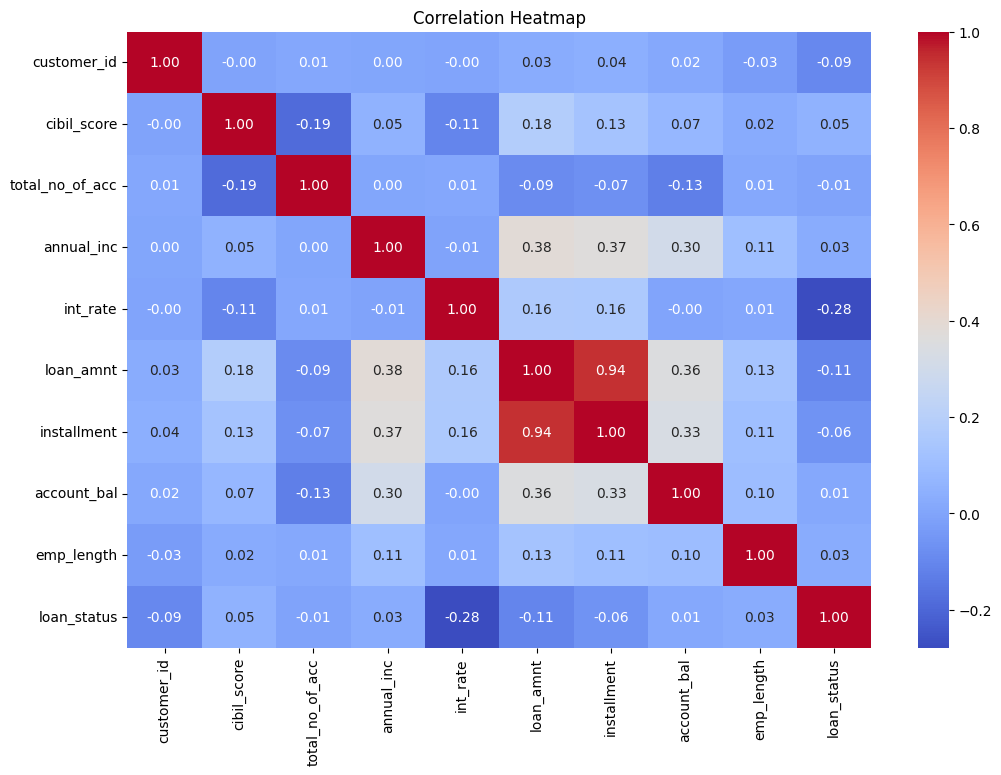

In [15]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

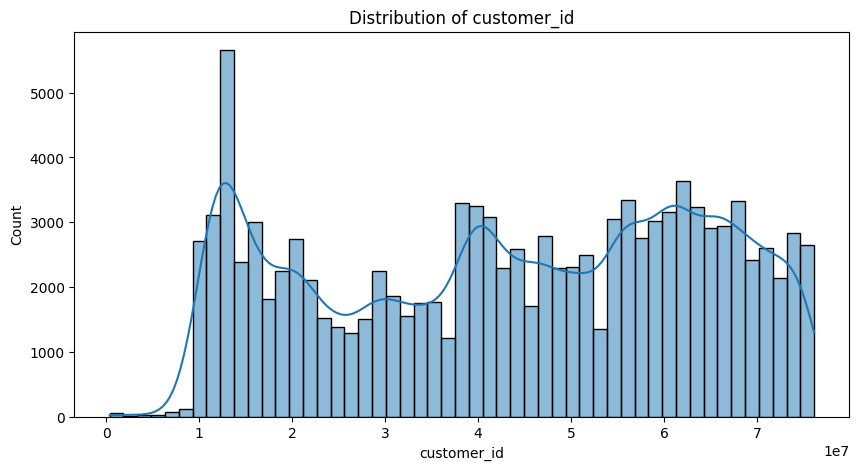

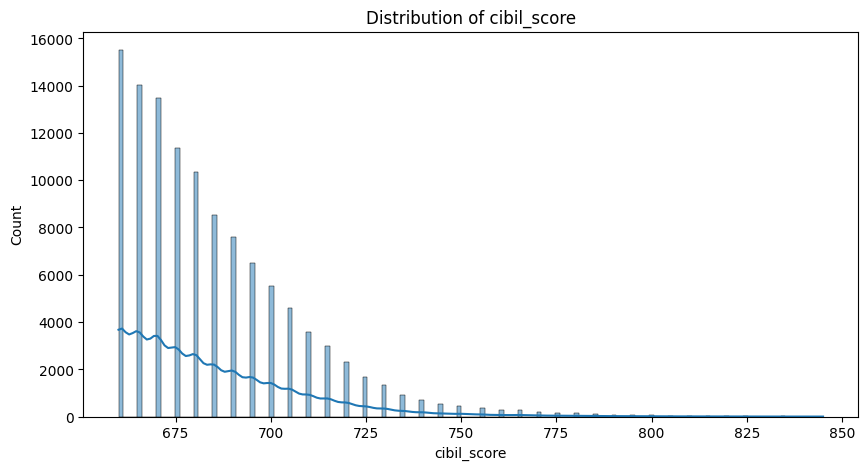

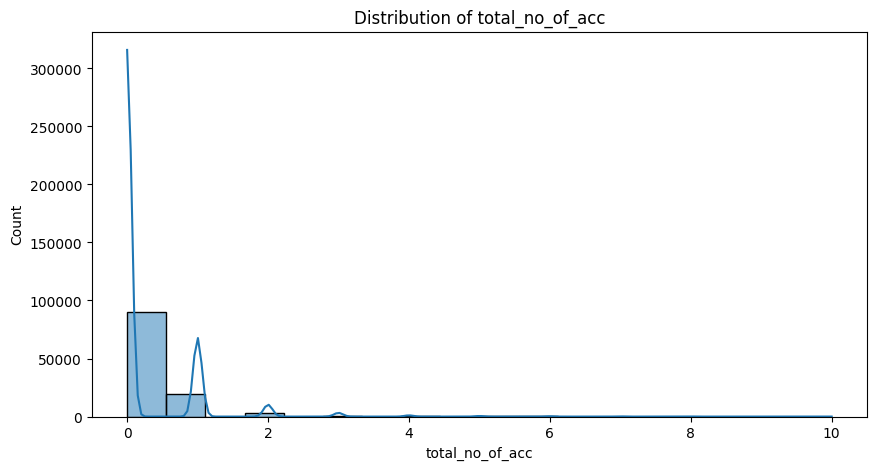

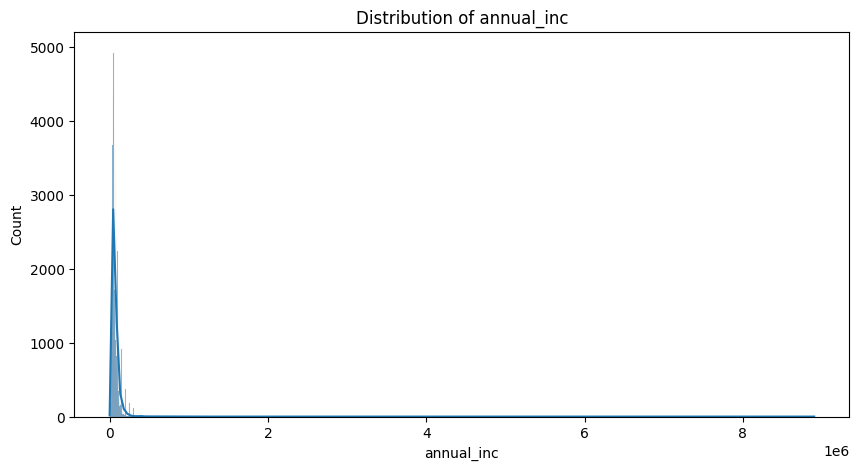

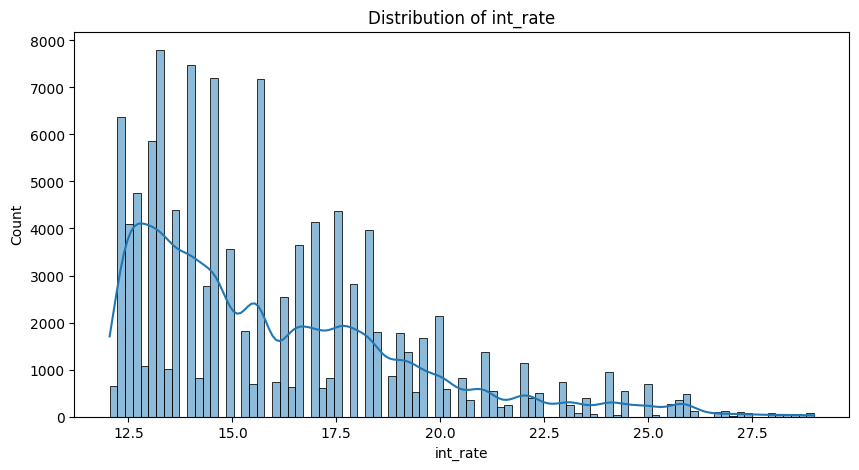

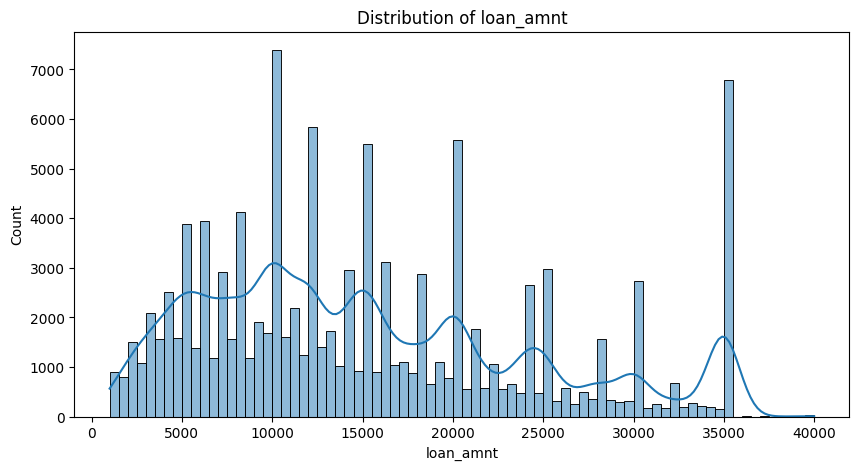

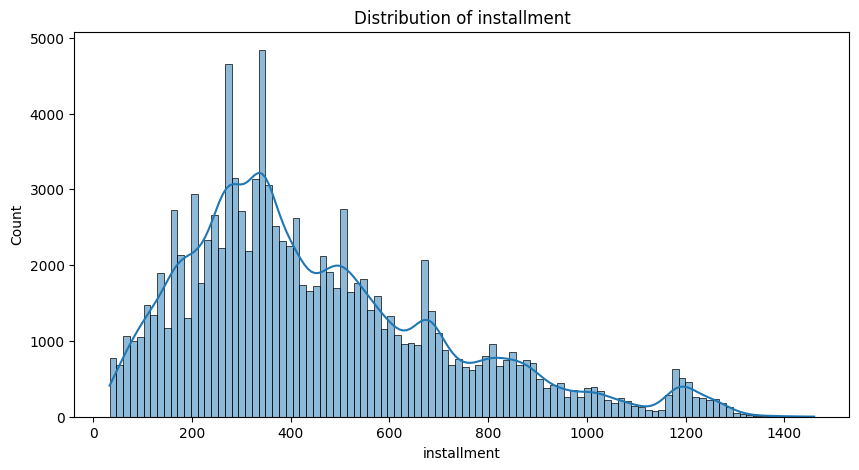

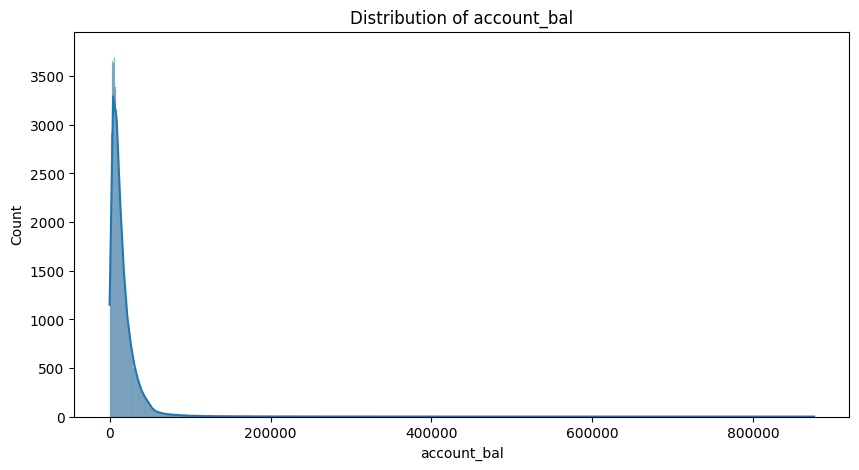

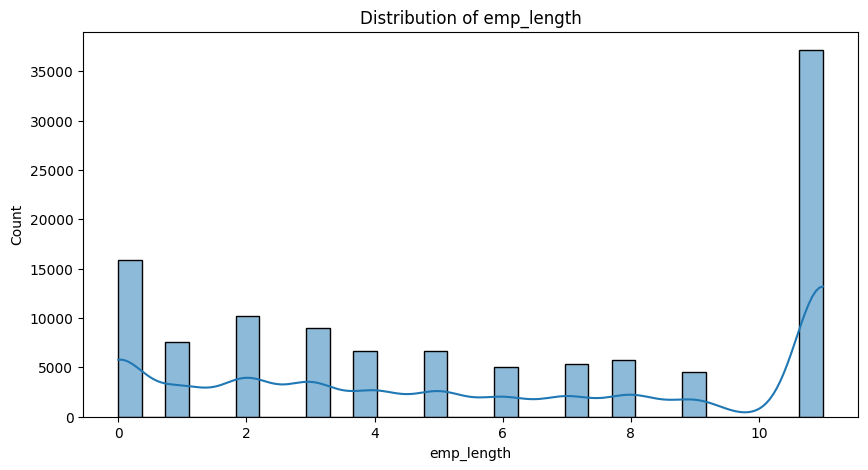

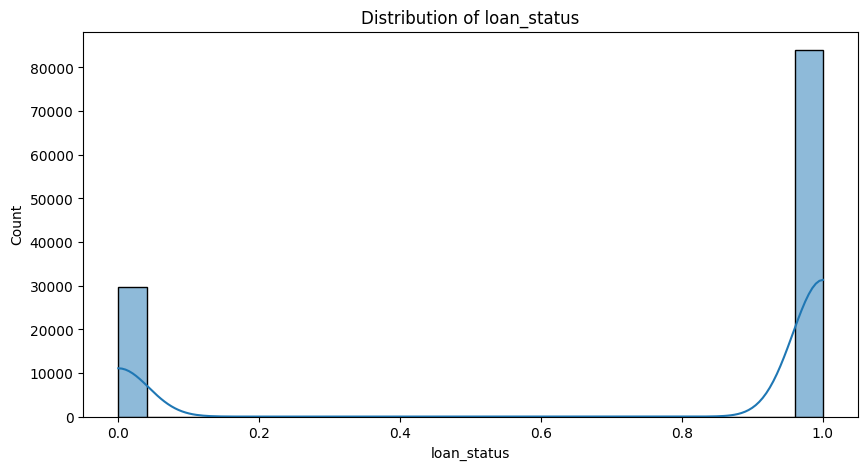

In [16]:

# Distribution plots for numerical columns
numerical_cols = train_data.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(train_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

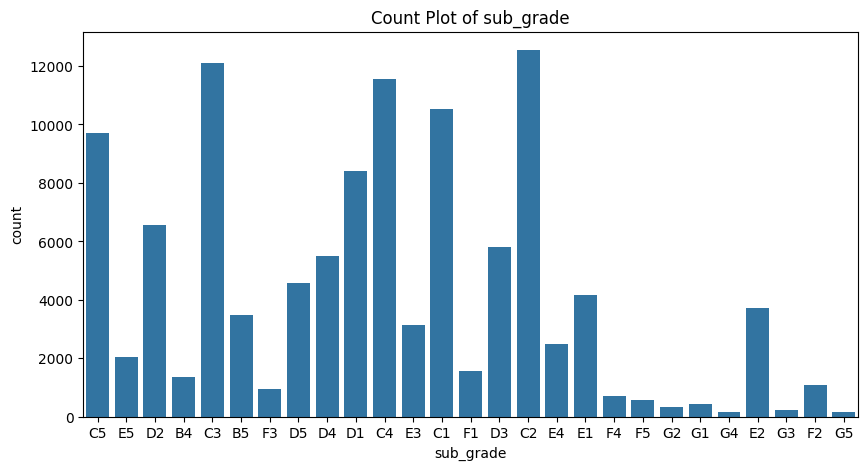

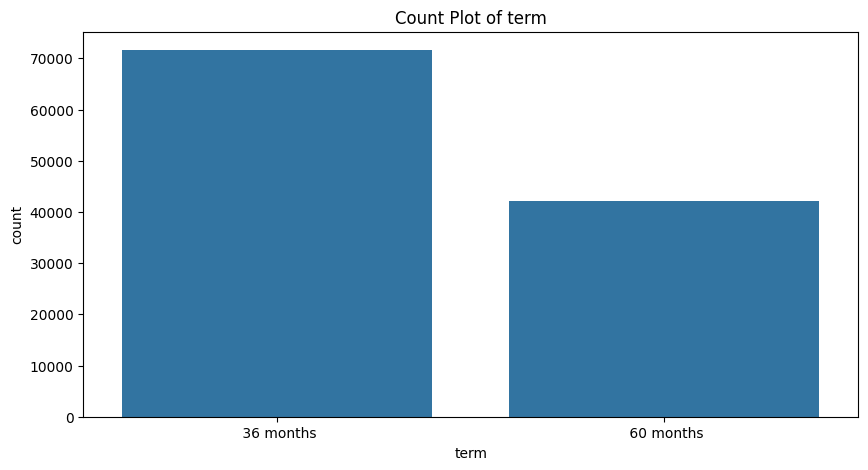

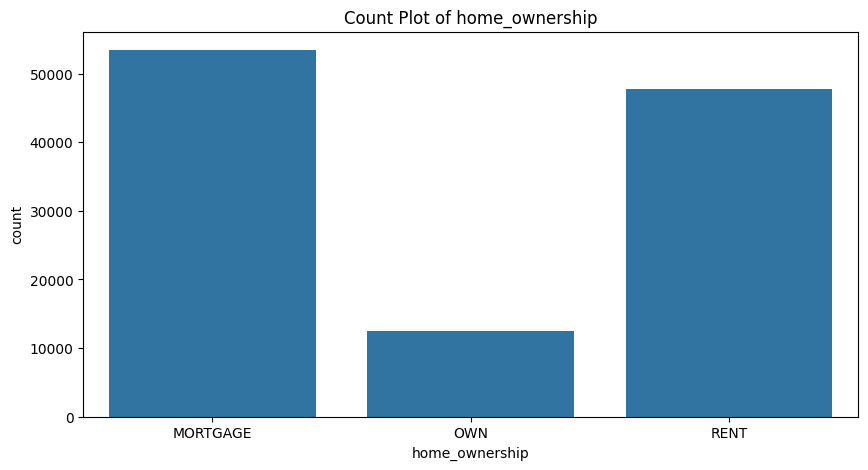

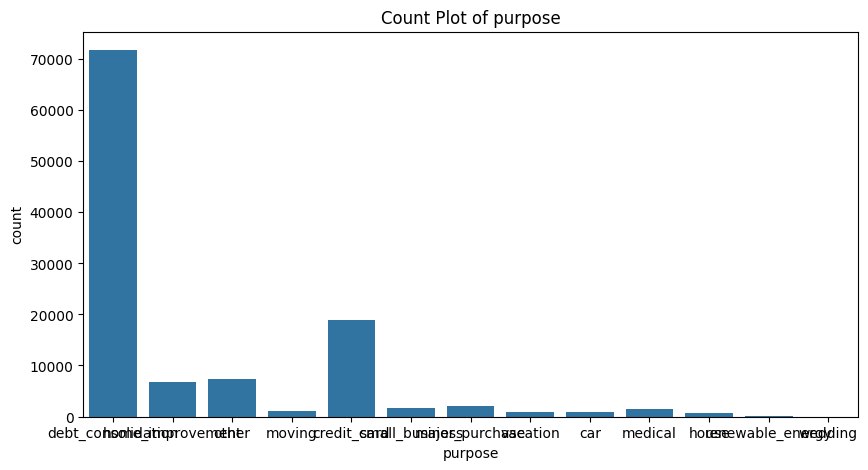

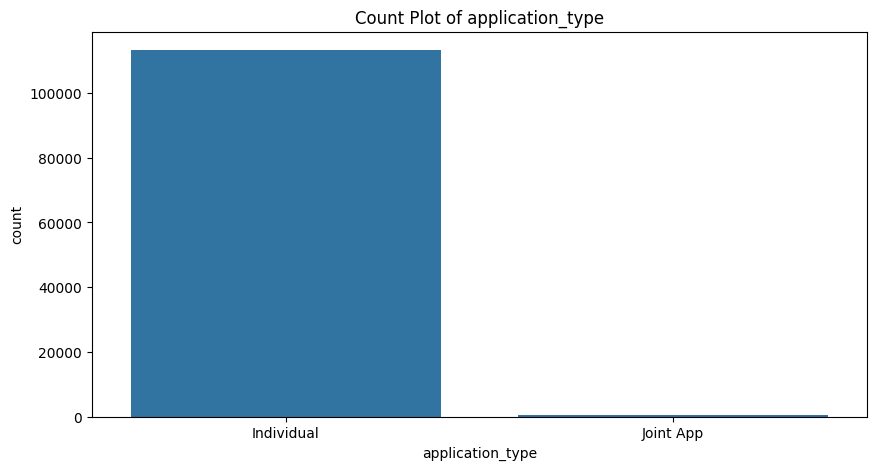

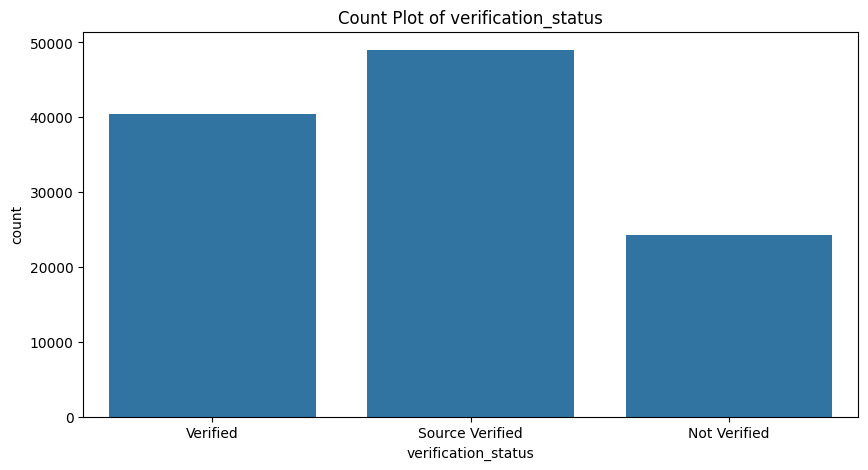

In [17]:
# Count plots for categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train_data, x=col)
    plt.title(f'Count Plot of {col}')
    plt.show()

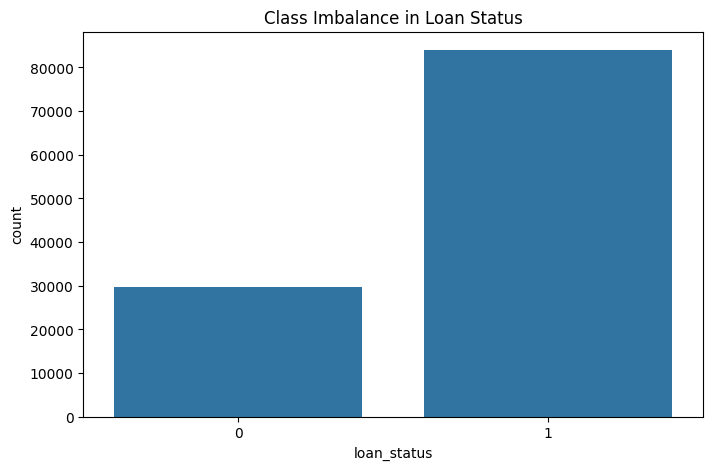

In [18]:
# Check for class imbalance in loan_status
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='loan_status')
plt.title('Class Imbalance in Loan Status')
plt.show()